# Create distance-to-polygon-border layer

There are cases of remote sensing data analysis we have reference data (polygon vector data) which corresponds to to the extend of the features they represent on earth. 
As a consequence, the pixels that are at the inner border of the polygon are most likely so called mixed pixels.
In such a situation the polygons are often buffered before used to do the extraction of raster values and the analysis. 
This is less flexible or more laberous for advanced analysis.

To be more flexible in the analysis of the extracted raster data it can be advantageous to create a distance-to-polygon-border layer.
Then we can also extract the distance of each pixel to the next polygon border and use this information in the analysis.

The function  ``eobox.vector.calc_distance_to_border`` makes it is easy to calculate such layer. 
It is described in this tutorial how to use it.

In [1]:
#import fiona
import geopandas as gpd
import matplotlib.pyplot as plt
#import numpy as np
from pathlib import Path
import rasterio
#import shapely
#import pandas as pd
#from shapely.geometry import LineString

from eobox.sampledata import get_dataset
from eobox.vector import calc_distance_to_border

%matplotlib inline

## The sample dataset

In [2]:
ds = get_dataset('s2l1c')

src_file_vector = ds['vector_file_osm']
template_file_raster = ds['raster_files'][0]

# *xxx_uncontrolled* is in the eo-box .gitignore
interim_file_lines = "./xxx_uncontrolled_d2b/_interim_sample_vector_dataset_lines.shp"
interim_file_lines_raster = "./xxx_uncontrolled_d2b/_interim_sample_vector_dataset_lines_raster.tif"

dst_file_proximity = "./xxx_uncontrolled_d2b/distance_to_polygon_border__vector_dataset.tif"

## Processing

### Goal

For a given raster dataset we want know for each pixel, how far away it is (in pixel distance) from the next polygon border of a vector dataset. 

### High-Level implementation

1) Convert the polygon vector dataset in lines and save them in the CRS of the raster. 

2) Rasterize the lines in the empty raster.

3) Calculate the proximity. 

### Useage

In [3]:
calc_distance_to_border(polygons=src_file_vector,
                        template_raster=template_file_raster,
                        dst_raster=dst_file_proximity,
                        overwrite=False, 
                        keep_interim_files=True)  # stores the vector and rasterized lines  

100%|██████████| 604/604 [00:00<00:00, 48161.81it/s]


Interim files are in xxx_uncontrolled_d2b/TEMPDIR_distance_to_polygon_border__vector_dataset_xqijr5sc


0

## Vizualize results

In [4]:
import rasterio.plot

In [5]:
r = rasterio.open(template_file_raster)
r_d2b = rasterio.open(dst_file_proximity)
v = gpd.read_file(src_file_vector)

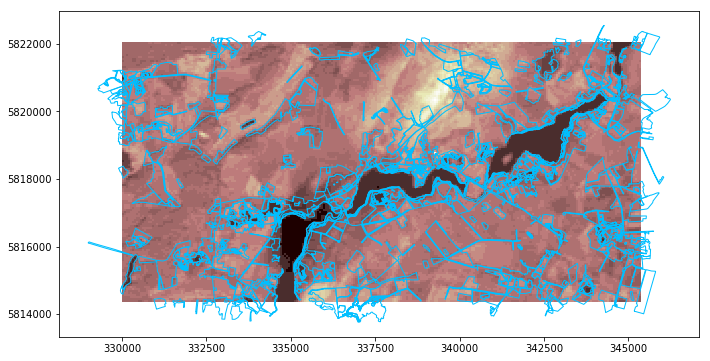

In [6]:
fig, ax = plt.subplots(figsize=(16, 6))
rasterio.plot.show(r, cmap='pink', ax=ax)
v.plot(ax=ax, facecolor='none', edgecolor='deepskyblue')

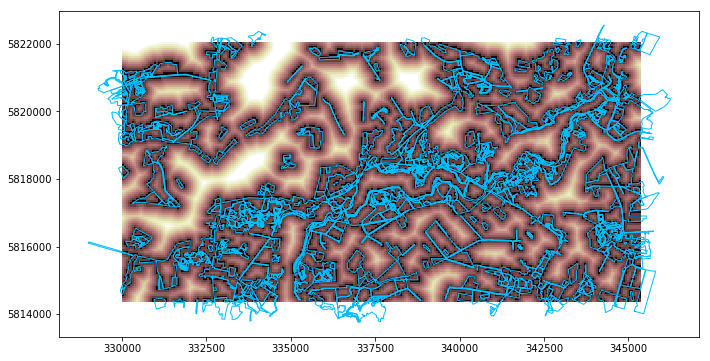

In [7]:
fig, ax = plt.subplots(figsize=(16, 6))
rasterio.plot.show(r_d2b, vmin=0, vmax=10, cmap='pink', ax=ax)
v.plot(ax=ax, facecolor='none', edgecolor='deepskyblue')